In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [139]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\final_cars_datasets.csv')

# Let see the shape and types of features and any null values


In [140]:
df.shape


(2318, 11)

In [141]:
df.describe()

,Unnamed: 0,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [142]:
df.isnull().sum()

Unnamed: 0         0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [143]:
df.columns

Index(['Unnamed: 0', 'price', 'mark', 'model', 'year', 'mileage',
       'engine_capacity', 'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [144]:
df['Unnamed: 0'].unique()

array([   0,    1,    2, ..., 2333, 2334, 2335], dtype=int64)

In [10]:
df.head(5)

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [145]:
df['transmission'].unique()
df['drive'].unique()
df['hand_drive'].unique()
df['fuel'].unique()


array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

#Drop the columns in which all the data in the feature is incremental data or id or same

In [146]:
df.drop(columns=['Unnamed: 0'], axis =1,inplace=True)

In [147]:
df.dtypes

price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

In [148]:
df['mileage']=df['mileage'].round(0).astype(int)

In [149]:
df['Current_Year']=2021
df['NoofYears'] = df['Current_Year'] - df['year']
df['NoofYears'].unique()
df.drop(['year','Current_Year'],axis=1,inplace=True)

In [150]:
df.head(5)

,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,NoofYears
0,80,nissan,march,80000,1240,at,2wd,rhd,gasoline,18
1,110,nissan,march,53000,1200,at,2wd,rhd,gasoline,11
2,165,nissan,lafesta,47690,2000,at,2wd,rhd,gasoline,16
3,190,toyota,avensis,130661,1990,at,2wd,rhd,gasoline,13
4,190,daihatsu,mira,66300,660,at,2wd,rhd,gasoline,15


#Univariate feature analysis  for categorical values

In [151]:
df.columns

Index(['price', 'mark', 'model', 'mileage', 'engine_capacity', 'transmission',
       'drive', 'hand_drive', 'fuel', 'NoofYears'],
      dtype='object')

In [152]:
cdf=df[['mark', 'model', 'transmission','drive', 'hand_drive', 'fuel']]
ndf=df[['price','NoofYears','mileage', 'engine_capacity']]

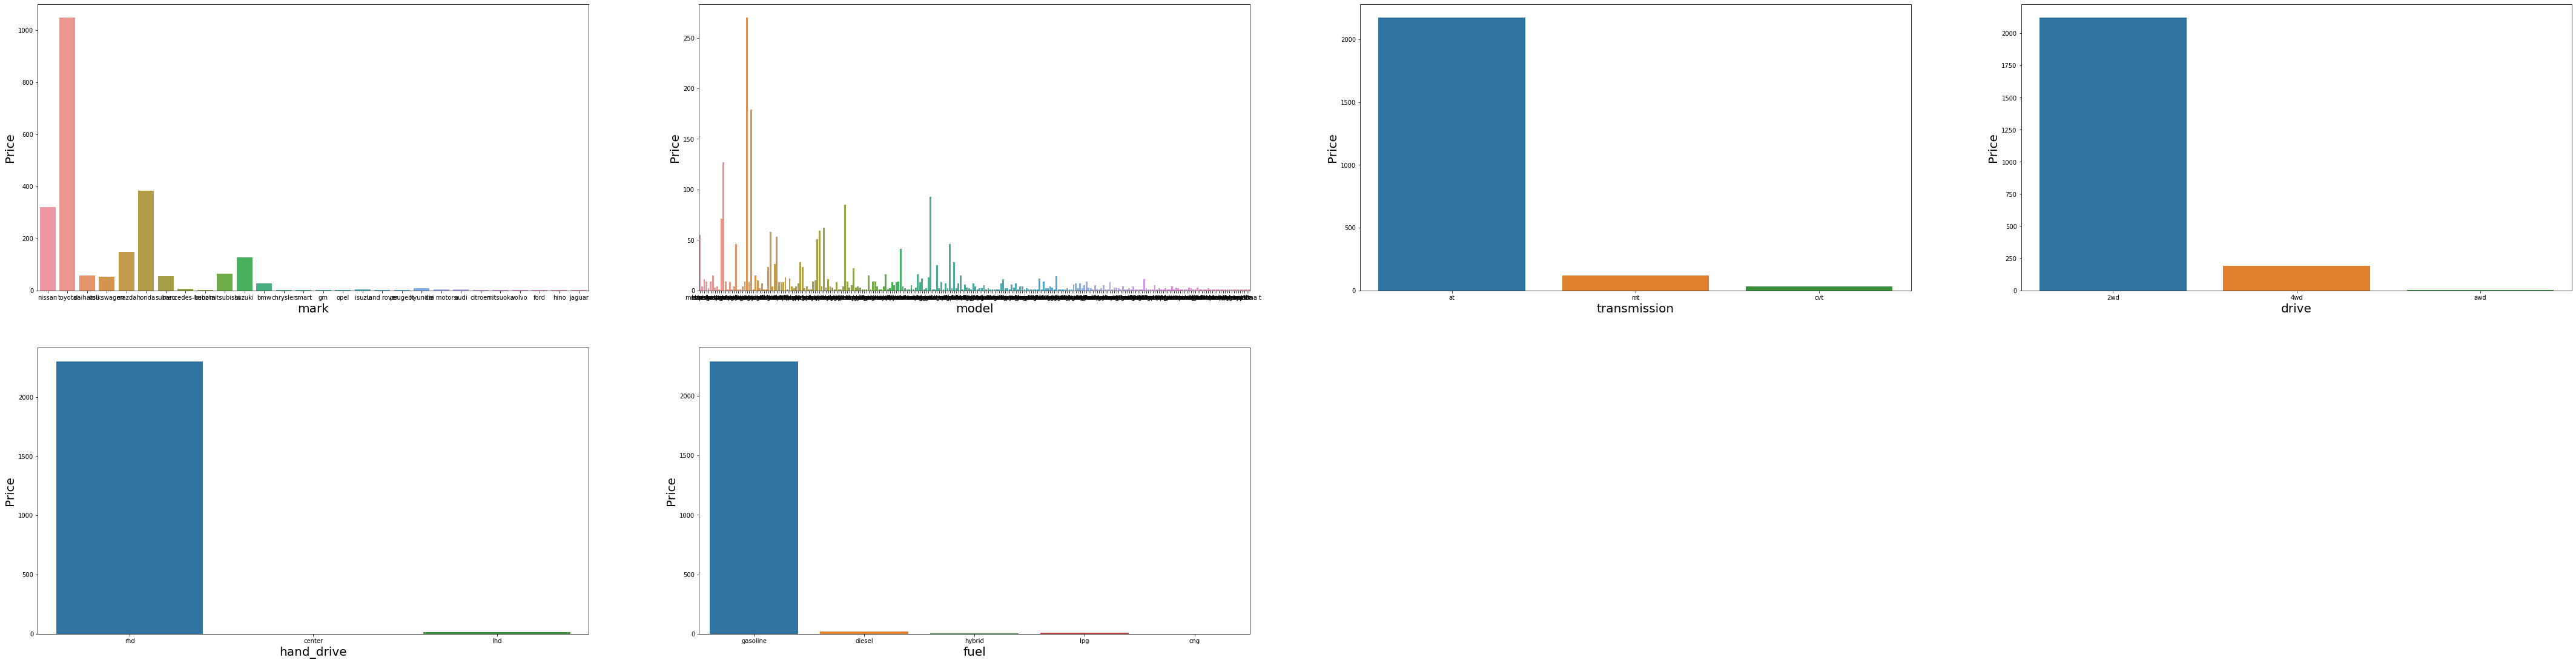

In [153]:
plotnumber=1
plt.figure(figsize=(75,40))
for column in cdf:
    if plotnumber<=6 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=column,data=df)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1


In [154]:
df['mark'].value_counts().unique()

array([1047,  382,  320,  148,  126,   65,   56,   54,   52,   27,    9,
          5,    4,    3,    2,    1], dtype=int64)

In [155]:
df['model'].value_counts().unique()

array([270, 179, 127,  93,  85,  71,  62,  59,  58,  55,  53,  51,  46,
        41,  28,  26,  25,  23,  22,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [ ]:
Univariate feature analysis

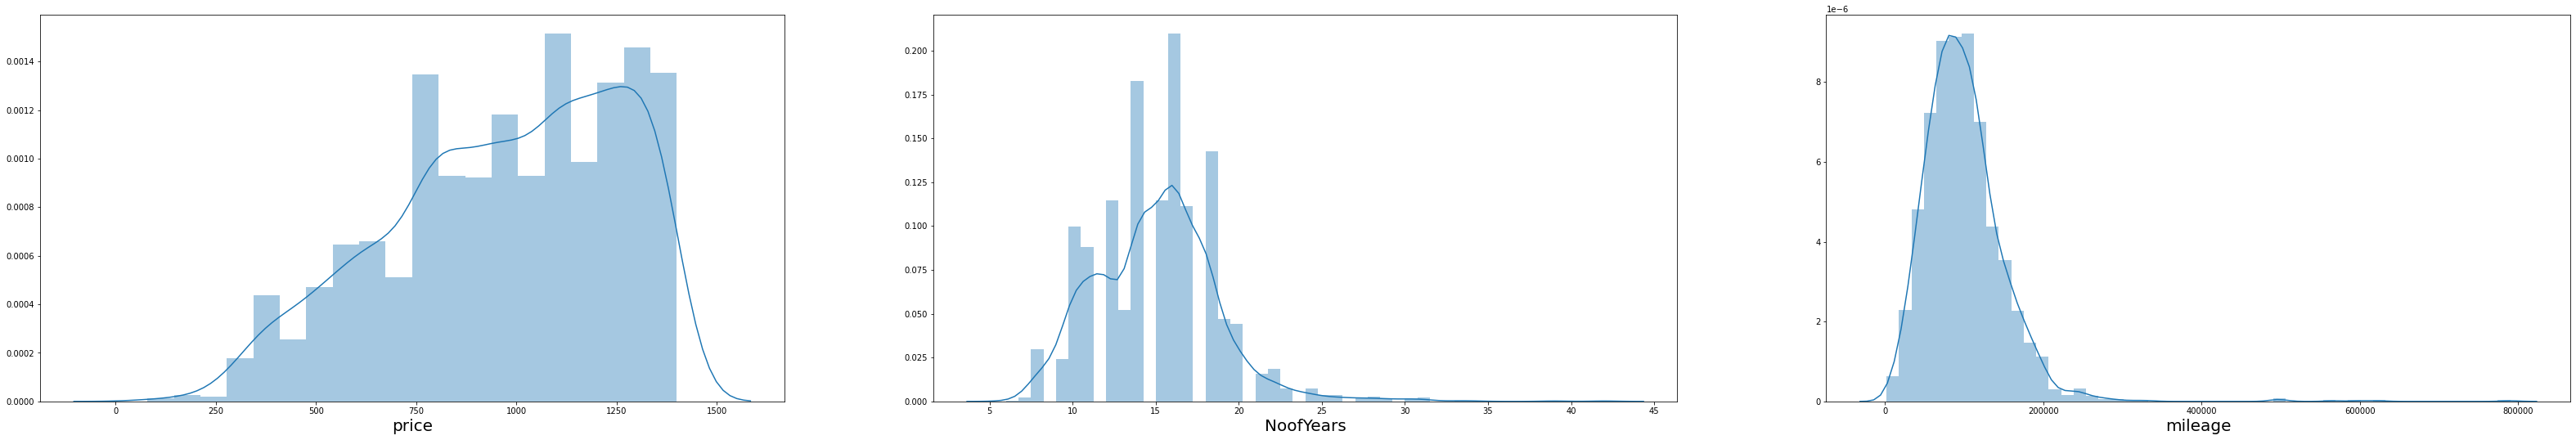

In [156]:
plotnumber=1
plt.figure(figsize=(75,40))
for column in ndf:
    if plotnumber<=3 :
        ax = plt.subplot(4,4,plotnumber)
        #sns.distplot(df[column],kde=False)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
      
    plotnumber+=1


# Multivariate feature analysis

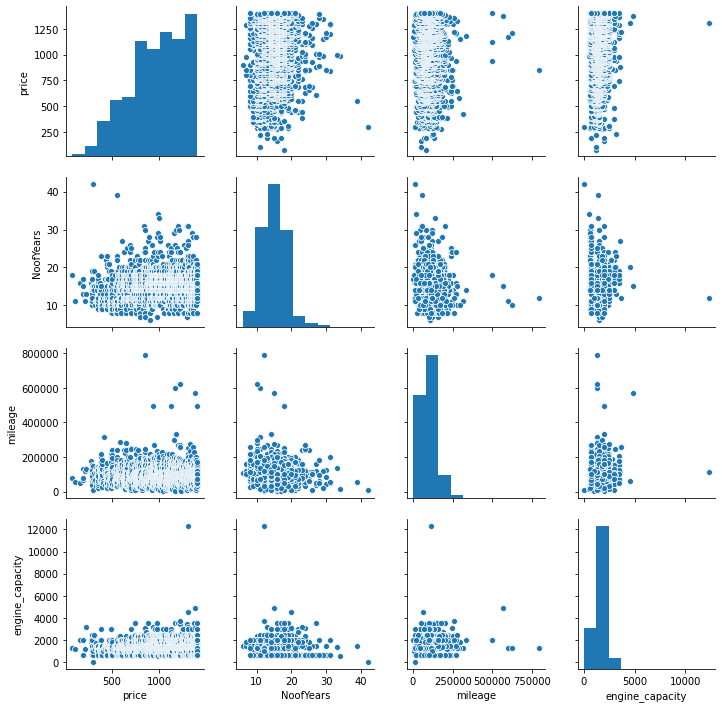

In [24]:
sns.pairplot(ndf)
     

<AxesSubplot:xlabel='NoofYears', ylabel='mileage'>

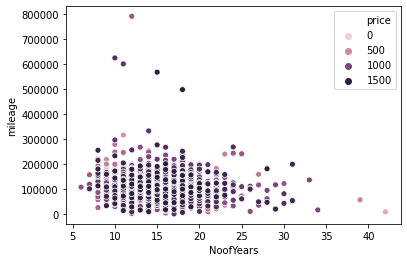

In [27]:
sns.scatterplot('NoofYears','mileage',hue='price',data=df)

<AxesSubplot:xlabel='engine_capacity', ylabel='mileage'>

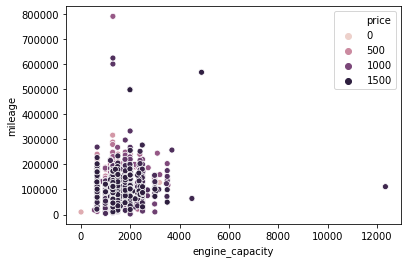

In [26]:
sns.scatterplot('engine_capacity','mileage',hue='price',data=df)

<AxesSubplot:>

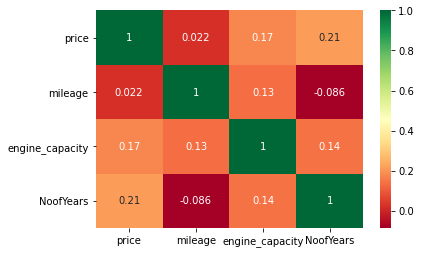

In [20]:
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Do feature engineering to categorical data

In [157]:
cdf.drop(columns=['mark', 'model'],axis=1, inplace=True)
#'transmission','drive', 'hand_drive', 'fuel']]

In [158]:
df1=pd.get_dummies(df['transmission'],drop_first=True)
df2=pd.get_dummies(df['drive'],drop_first=True)
df3=pd.get_dummies(df['hand_drive'],drop_first=True)
df4=pd.get_dummies(df['fuel'],drop_first=True)

cdf=pd.concat([df1,df2,df3,df4,cdf],axis=1)
cdf.drop(columns=['transmission','drive','hand_drive','fuel'],axis=1,inplace=True)

In [159]:
cdf.head(5)

,cvt,mt,4wd,awd,lhd,rhd,diesel,gasoline,hybrid,lpg
0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0


In [160]:
ndf.head(3)

,price,NoofYears,mileage,engine_capacity
0,80,18,80000,1240
1,110,11,53000,1200
2,165,16,47690,2000


In [161]:
y=ndf['price']
X=ndf.drop('price',axis =1)


In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [163]:
X_scaled 

array([[ 0.80376905, -0.38119536, -0.48594542],
       [-1.0891129 , -0.8954698 , -0.5587433 ],
       [ 0.26294564, -0.99661044,  0.89721414],
       ...,
       [ 0.26294564,  0.01879587, -1.54151457],
       [ 1.61500417,  1.33305279, -1.54151457],
       [ 0.26294564, -0.52747787,  2.71716095]])

In [164]:
final_df=pd.concat([cdf,pd.DataFrame(X_scaled,columns=['NoofYears','mileage','engine_capacity'])], axis=1)


In [165]:
final_df.head(3)

,cvt,mt,4wd,awd,lhd,rhd,diesel,gasoline,hybrid,lpg,NoofYears,mileage,engine_capacity
0,0,0,0,0,0,1,0,1,0,0,0.803769,-0.381195,-0.485945
1,0,0,0,0,0,1,0,1,0,0,-1.089113,-0.895470,-0.558743
2,0,0,0,0,0,1,0,1,0,0,0.262946,-0.996610,0.897214


In [ ]:
# Do Train and test split and go for model selection